# Clean Amazon Reviews Dataset

## Notebook Setup

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import os

from bs4 import BeautifulSoup

import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import spacy 
spacy.cli.download("en_core_web_sm")

from collections import Counter 

import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rmcnamara4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.6 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Load Data

In [36]:
data = pd.read_csv('../Data/train.csv', names = ['polarity', 'title', 'review'])
data = data.drop('title', axis = 1)

## EDA

### General Statistics

In [37]:
print('Data Info:') 
print(data.info())
print()
print(f'Null Values:\n{data.isna().sum()}')
print()
print('Number of reviews:', len(data))

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   review    object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB
None

Null Values:
polarity    0
review      0
dtype: int64

Number of reviews: 3600000


### Character Length Distribution

In [38]:
review_lengths = data['review'].apply(len)
print(f'Average Review Character Length: {review_lengths.mean()}')
print(f'Median Review Character Length: {review_lengths.median()}')
print(f'Max Review Character Length: {review_lengths.max()}')
print(f'Min Review Character Length: {review_lengths.min()}')

Average Review Character Length: 405.1396275
Median Review Character Length: 356.0
Max Review Character Length: 1010
Min Review Character Length: 4


We can see that the mean is slightly higher than the median, indicating that the character length distribution of the reviews is slightly right-skewed. Let's confirm this with a histogram of the character lengths. 

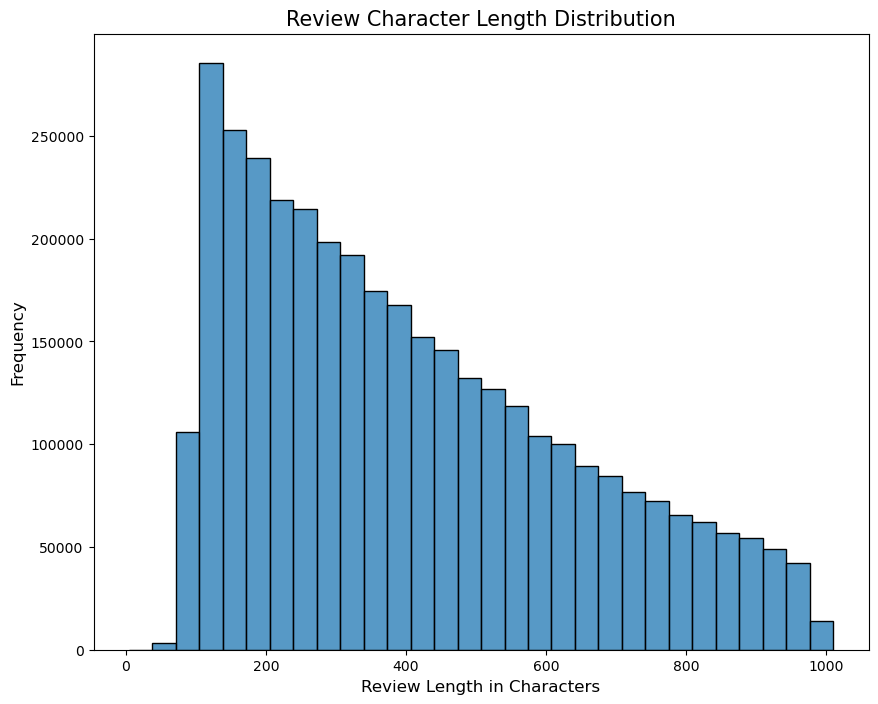

In [39]:
plt.figure(figsize = (10, 8))
sns.histplot(data = review_lengths, bins = 30, fill = 'lightblue', edgecolor = 'black')
plt.xlabel('Review Length in Characters', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12) 
plt.title('Review Character Length Distribution', fontsize = 15)
plt.show()

### Target (Polarity) Distribution

In [46]:
polarity_value_counts = data['polarity'].value_counts(normalize = True)

print('Polarity Distribution:') 
print(polarity_value_counts)

Polarity Distribution:
polarity
2    0.5
1    0.5
Name: proportion, dtype: float64


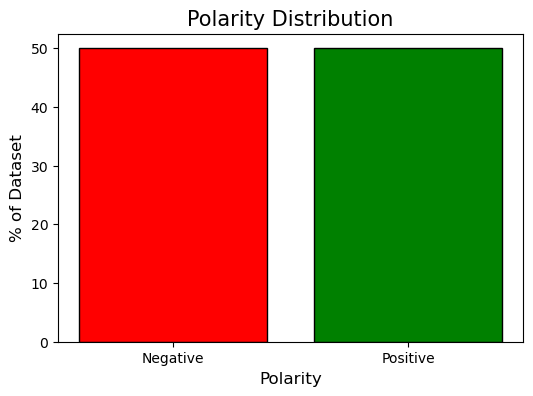

In [50]:
plt.figure(figsize = (6, 4))
plt.bar(x = polarity_value_counts.index, height = polarity_value_counts.values * 100, edgecolor = 'black', color = ['green', 'red'])
plt.xlabel('Polarity', fontsize = 12) 
plt.ylabel('% of Dataset', fontsize = 12) 
plt.xticks(ticks = [1, 2], labels = ['Negative', 'Positive']) 
plt.title('Polarity Distribution', fontsize = 15)
plt.show()


## Clean Reviews

### Remove HTML Tags

In [51]:
def remove_html(text): 
    return BeautifulSoup(text, 'html.parser').get_text()

data['cleaned_review'] = data['review'].apply(remove_html) 

/var/folders/49/nylxv9qs7xq7ls3kk0ht7dhr0000gn/T/ipykernel_24576/2382582940.py:2: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  return BeautifulSoup(text, 'html.parser').get_text()
/var/folders/49/nylxv

### Remove Punctuation

In [55]:
def remove_punctuation(text): 
    return text.translate(str.maketrans('', '', string.punctuation))

data['cleaned_review'] = data['cleaned_review'].apply(remove_punctuation)

In [57]:
print('Non-Cleaned Review:')
print(data['review'][67])
print()
print('Cleaned Review:')
print(data['cleaned_review'][67])

Non-Cleaned Review:
My four year old daughter loves everything Barbie and loves the Rapunzel movie. This game is tons of fun, even for a 42 year old. We love playing it together. We love decorating all the rooms and finding the gems. What even better is, she can play it alone and I get some me time!

Cleaned Review:
My four year old daughter loves everything Barbie and loves the Rapunzel movie This game is tons of fun even for a 42 year old We love playing it together We love decorating all the rooms and finding the gems What even better is she can play it alone and I get some me time


### Convert to Lowercase

In [58]:
data['cleaned_review'] = data['cleaned_review'].str.lower()

### Tokenization

In [ ]:
data['tokens_nltk'] = data['cleaned_review'].apply(word_tokenize)

In [ ]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser', 'textcat'])
def tokenize_spacy(texts): 
    docs = list(nlp.pipe(texts, batch_size = 500))
    return [[token.text for token in doc] for doc in docs]
data['tokens_spacy'] = tokenize_spacy(data['cleaned_review'].tolist())

### Remove Stopwords 

### Lemmatization

### Convert Numbers

### Rejoin to Clean Text